#### SETUP

In [4]:
import pandas as pd

df = pd.read_csv("foodhub_order.csv")

In [5]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Q1: Which top 10 cuisines made the most revenue?

In [24]:
df.groupby(['cuisine_type']).sum('cost_of_the_order').sort_values(by = "cost_of_the_order", ascending = False).head(10)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
cuisine_type,,,,,
American,862853485,107555095,9530.78,16025,14129
Japanese,694417840,75902159,7663.13,12930,11342
Italian,440303276,47551355,4892.77,8190,7321
Chinese,317668929,38803384,3505.62,5915,5129
Mexican,113763379,13971923,1303.85,2058,1878
Indian,107857010,11833767,1235.14,1979,1758
Middle Eastern,72393190,8273157,922.21,1307,1180
Mediterranean,67964240,5331774,711.84,1242,1085
Thai,28074933,3853678,364.95,519,440


##### Q2: Which top 10 restaurants make the most revenue?

In [26]:
df.groupby(['restaurant_name']).sum('cost_of_the_order').sort_values(by = 'cost_of_the_order', ascending = False).head(10)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
restaurant_name,,,,,
Shake Shack,323578315,41827816,3579.53,6120,5401
The Meatball Shop,195029322,20650082,2145.21,3588,3200
Blue Ribbon Sushi,175813497,19453411,1903.95,3323,2849
Blue Ribbon Fried Chicken,141840344,17671001,1662.29,2611,2318
Parm,100476245,11512165,1112.76,1857,1734
RedFarm Broadway,87175249,11458134,965.13,1628,1366
RedFarm Hudson,81261631,8538231,921.21,1494,1331
TAO,72397918,9407243,834.50,1312,1135
Han Dynasty,67969938,7260014,755.29,1261,1065


##### Q3: What is the total revenue made on Weekend vs. Weekday?

In [39]:
df.groupby(['day_of_the_week']).sum('cost_of_the_order')

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
day_of_the_week,,,,,
Weekday,808183458,94636892,8922.22,14885,15502
Weekend,1996103001,230240880,22392.60,37067,30357


##### Q4: The restaurant wants to give a free lunch coupon to their top customers. Identify a criteria from the dataset which they could use to find their top customers to give a coupon

In [75]:
newdf = df[['customer_id','cost_of_the_order','restaurant_name']]

In [78]:
newdf

,customer_id,cost_of_the_order,restaurant_name
0,337525,30.75,Hangawi
1,358141,12.08,Blue Ribbon Sushi Izakaya
2,66393,12.23,Cafe Habana
3,106968,29.20,Blue Ribbon Fried Chicken
4,76942,11.59,Dirty Bird to Go
...,...,...,...
1893,292602,22.31,Chipotle Mexican Grill $1.99 Delivery
1894,397537,12.18,The Smile
1895,35309,25.22,Blue Ribbon Sushi
1896,64151,12.18,Jack's Wife Freda


In [79]:
newdf.groupby('customer_id').sum('cost_of_the_order').sort_values(by ='cost_of_the_order', ascending = False).head(5)

,cost_of_the_order
customer_id,
52832,225.80
250494,183.83
47440,158.18
276192,146.46
83287,139.31


###### Criteria to find customers is : who frequently visit the restuarant and the sum of their orders is among the top 5.

##### Q5: From the orders advise the restaurant the commission structure they should employ to boost their net revenue. Assuming the company charges a flat 10% commission on the orders. Back your answer with analysis

In [81]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


##### Using Shake Shack Restaurant as case study to determine commission structure to boost revenue

In [179]:
shake_df = df[df.restaurant_name == 'Shake Shack']

In [180]:
shake_df['Commission(10%)'] = 0.1 * shake_df.cost_of_the_order

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_1029/396633022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shake_df['Commission(10%)'] = 0.1 * shake_df.cost_of_the_order


In [183]:
shake_df['Net_Revenue'] = shake_df.cost_of_the_order - shake_df['Commission(10%)']

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_1029/3486572403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shake_df['Net_Revenue'] = shake_df.cost_of_the_order - shake_df['Commission(10%)']


In [184]:
shake_df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Commission(10%),Net_Revenue
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,1.620,14.580
21,1478226,137565,Shake Shack,American,15.91,Weekend,Not given,25,20,1.591,14.319
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,2.910,26.190
39,1476891,220693,Shake Shack,American,19.89,Weekend,Not given,27,19,1.989,17.901
64,1478077,82041,Shake Shack,American,33.03,Weekday,Not given,22,32,3.303,29.727
70,1477932,170221,Shake Shack,American,16.98,Weekend,Not given,22,21,1.698,15.282
71,1476651,58092,Shake Shack,American,8.00,Weekend,5,27,23,0.800,7.200
80,1477975,56722,Shake Shack,American,9.75,Weekend,5,33,25,0.975,8.775
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,0.475,4.275
90,1478183,329710,Shake Shack,American,5.72,Weekday,3,31,24,0.572,5.148


In [198]:
sum_net_rev = shake_df.Net_Revenue.sum()
sum_net_rev

print(f"The sum of net revenue Shake Shack earned with a 10% commission charged on all orders is ${sum_net_rev}")

The sum of net revenue Shake Shack earned with a 10% commission charged on all orders is $3221.577


<Axes: title={'center': 'Orders Made in Week'}>

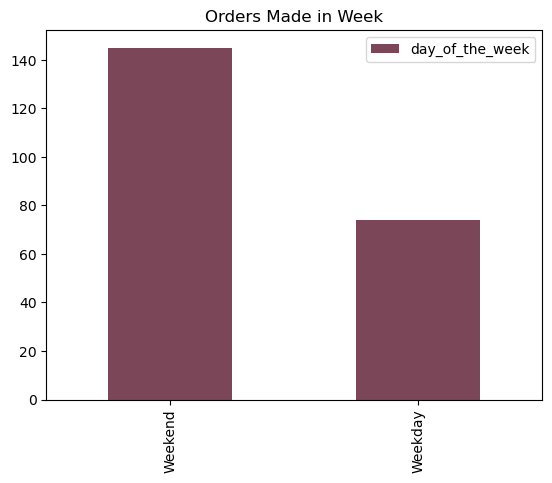

In [236]:
shake_df.day_of_the_week.value_counts().plot(kind = 'bar',color = '#7c4659', title = "Orders Made in Week", legend = True )

##### Shake Shack restaurant makes a lot of sales on weekends as compared to weekdays. In order to boost their net revenue, since less sales is made during the weekday, a commission of 5% should be charged on every order made during the week and then 10% commission charged on orders made on weekends.")

###### Charge 5% commission on all orders made during the Week

In [204]:
reduced_comm = shake_df[shake_df.day_of_the_week == 'Weekday']

In [205]:
reduced_comm['new_commission'] = 0.05 * reduced_comm.cost_of_the_order

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_1029/2147958661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_comm['new_commission'] = 0.05 * reduced_comm.cost_of_the_order


In [206]:
reduced_comm

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Commission(10%),Net_Revenue,new_commission
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,2.910,26.190,1.4550
64,1478077,82041,Shake Shack,American,33.03,Weekday,Not given,22,32,3.303,29.727,1.6515
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,0.475,4.275,0.2375
90,1478183,329710,Shake Shack,American,5.72,Weekday,3,31,24,0.572,5.148,0.2860
97,1476689,305522,Shake Shack,American,24.20,Weekday,4,29,29,2.420,21.780,1.2100
...,...,...,...,...,...,...,...,...,...,...,...,...
1783,1478405,58675,Shake Shack,American,11.59,Weekday,3,23,25,1.159,10.431,0.5795
1794,1476976,300552,Shake Shack,American,22.26,Weekday,5,33,32,2.226,20.034,1.1130
1823,1477050,337230,Shake Shack,American,15.18,Weekday,Not given,34,30,1.518,13.662,0.7590
1870,1477362,172758,Shake Shack,American,12.23,Weekday,4,31,24,1.223,11.007,0.6115


In [207]:
weekday_new_revenue = reduced_comm.cost_of_the_order.sum() - reduced_comm.new_commission.sum()
weekday_new_revenue

1176.366

In [208]:
old_comm  = shake_df[shake_df.day_of_the_week == 'Weekend']
old_comm

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Commission(10%),Net_Revenue
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,1.620,14.580
21,1478226,137565,Shake Shack,American,15.91,Weekend,Not given,25,20,1.591,14.319
39,1476891,220693,Shake Shack,American,19.89,Weekend,Not given,27,19,1.989,17.901
70,1477932,170221,Shake Shack,American,16.98,Weekend,Not given,22,21,1.698,15.282
71,1476651,58092,Shake Shack,American,8.00,Weekend,5,27,23,0.800,7.200
...,...,...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,1.397,12.573
1881,1476700,127036,Shake Shack,American,12.23,Weekend,Not given,27,18,1.223,11.007
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,3.143,28.287
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30,0.582,5.238


In [212]:
weekend_old_revenue = old_comm.cost_of_the_order.sum() - old_comm['Commission(10%)'].sum()

In [213]:
weekend_old_revenue

2107.125

In [214]:
new_net_revenue = weekday_new_revenue + weekend_old_revenue
new_net_revenue

3283.491

In [215]:
print(f""" Using Shake Shack Restaurant as a case study, when 5% commission is charged on weekday orders and 10% charged for weekends the net revenue Shake Shack makes is ${new_net_revenue}
but when 10% commission is charged on orders made both weekends and weekdays, the net revenue Shake Shack makes is ${net_rev}""")

 Using Shake Shack Restaurant as a case study, when 5% commission is charged on weekday orders and 10% charged for weekends the net revenue Shake Shack makes is $3283.491
but when 10% commission is charged on orders made both weekends and weekdays, the net revenue Shake Shack makes is $3221.577


In [217]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


<Axes: ylabel='Frequency'>

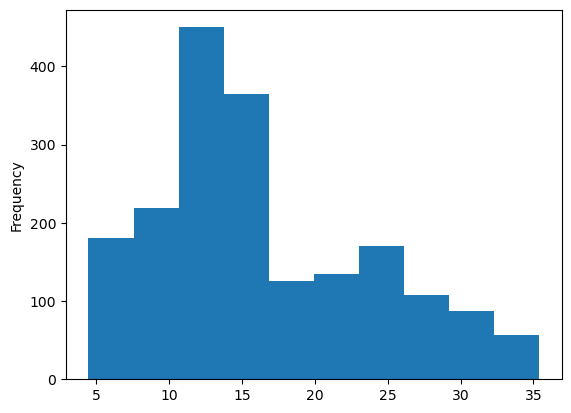

In [239]:
df.cost_of_the_order.plot(kind ='hist')

<Axes: >

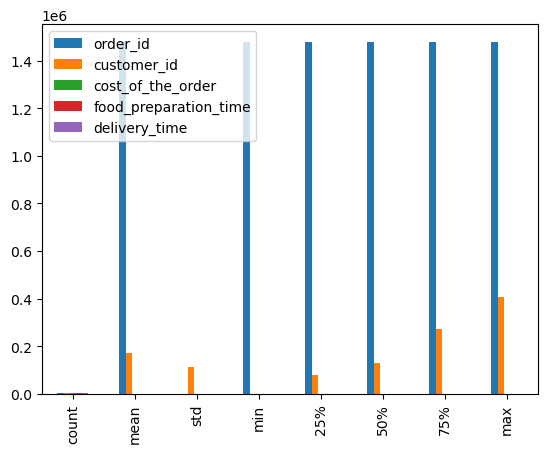

In [235]:
df.describe().plot(kind = 'bar')